In [1]:
%pip install -r https://raw.githubusercontent.com/hayesla/DynaSun_workshop/main/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.7/515.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.9/961.9 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 97.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.4/275.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/7

In [2]:
from sunpy.net import Fido, hek2vso, attrs as a
import sunpy.map
from sunpy.time import parse_time
import sunpy.timeseries
import sunpy.data.sample
from sunpy.coordinates import frames, get_horizons_coord, get_body_heliographic_stonyhurst
from sunpy.coordinates import SphericalScreen
import sunpy_soar

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import AsymmetricPercentileInterval, ImageNormalize, LogStretch, AsinhStretch
from scipy.interpolate import interp1d

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import dates

In [3]:
res = Fido.search(a.Time('2013-12-28T12:40:00', '2013-12-28T13:40:00'),
                  a.hek.EventType('FL'),
                  a.hek.Event.Coord1 < 800,
                  a.hek.Event.Coord1 > -800,
                  a.hek.Event.Coord2 < 800,
                  a.hek.Event.Coord2 > -800)

In [4]:
res_aia_dict = [{'start_time':np.datetime64(str(r['event_starttime'])), 'end_time':np.datetime64(str(r['event_endtime'])), 'coord1':r['event_coord1'], 'coord2':r['event_coord2'], 'wavelength':int(r['obs_meanwavel']*1e8)} for r in res['hek'] if r['obs_instrument'] == 'AIA']
dtypes = np.dtype([('start_time', 'datetime64[s]'),
                   ('end_time', 'datetime64[s]'),
                   ('coord1', float),
                   ('coord2', float),
                   ('wavelength', int)])
res_aia = np.empty(len(res_aia_dict), dtype=dtypes)
for i in range(len(res_aia_dict)):
    for k, v in res_aia_dict[i].items():
        res_aia[i][k] = res_aia_dict[i][k]

np.save('hek_28_dec_2013.npy', res_aia)

In [5]:
res_aia

array([('2013-12-28T09:46:01', '2013-12-28T13:02:01', -268.8, -268.8, 211),
       ('2013-12-28T12:40:00', '2013-12-28T12:58:00',   -9. ,  -17. , 131),
       ('2013-12-28T12:41:34', '2013-12-28T13:13:10', -115.2, -268.8, 131),
       ('2013-12-28T12:42:24', '2013-12-28T12:46:24', -192. , -268.8, 171),
       ('2013-12-28T12:42:31', '2013-12-28T12:58:43', -115.2, -268.8, 193),
       ('2013-12-28T13:02:46', '2013-12-28T13:45:58',  499.2, -268.8, 131),
       ('2013-12-28T13:06:00', '2013-12-28T13:31:00',   33. ,  -19. , 131)],
      dtype=[('start_time', '<M8[s]'), ('end_time', '<M8[s]'), ('coord1', '<f8'), ('coord2', '<f8'), ('wavelength', '<i8')])

In [6]:
print(len(res_aia))

7


In [7]:
Fido.search(a.Time('2013-12-28T12:40:00', '2013-12-28T13:10:00'), a.Instrument.aia, a.Wavelength(131*u.angstrom))

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Width,Extent Length,Extent Type,Size
,,,,Angstrom,,,,,,,Mibyte
Time,Time,str3,str3,float64[2],str4,str9,str6,str4,str4,str8,float64
2013-12-28 12:40:08.000,2013-12-28 12:40:09.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2013-12-28 12:40:20.000,2013-12-28 12:40:21.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2013-12-28 12:40:32.000,2013-12-28 12:40:33.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2013-12-28 12:40:44.000,2013-12-28 12:40:45.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2013-12-28 12:40:56.000,2013-12-28 12:40:57.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2013-12-28 12:41:08.000,2013-12-28 12:41:09.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2013-12-28 12:41:20.000,2013-12-28 12:41:21.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844
2013-12-28 12:41:32.000,2013-12-28 12:41:33.000,SDO,AIA,131.0 .. 131.0,JSOC,intensity,NARROW,4096,4096,FULLDISK,64.64844


In [ ]:
single_res = res_aia[1]
lines = [94, 131, 171, 193, 211, 304, 335]
# lines = [131]
# lines = [94, 131]
event_data = {l: Fido.fetch(Fido.search(a.Time('2013-12-28T12:40:00', '2013-12-28T13:10:00'), a.Instrument.aia, a.Wavelength(l*u.angstrom)), path="./{instrument}/{wavelength}/{file}") for l in lines}
# event = Fido.search(a.Time(single_res['start_time'], single_res['end_time']), a.Instrument.aia, a.Wavelength(single_res['wavelength']*u.angstrom))

Files Downloaded:   0%|          | 0/150 [00:00<?, ?file/s]

150/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/150 [00:00<?, ?file/s]

145/0 files failed to download. Please check `.errors` for details


Files Downloaded:   0%|          | 0/150 [00:00<?, ?file/s]

In [ ]:
import os
if not os.path.exists('images'):
    os.mkdir('images')
aia_maps = {l:[] for l in lines}
for l in lines:
    for filename in event_data[l]:
        m_aia_full = sunpy.map.Map(filename)
        m_aia_full = m_aia_full/m_aia_full.exposure_time
        bottom_left = SkyCoord((res_aia[0]['coord1']-150)*u.arcsec, (res_aia[0]['coord2']-250)*u.arcsec,  observer=m_aia_full.observer_coordinate, frame="helioprojective")
        top_right = SkyCoord((res_aia[0]['coord1']+150)*u.arcsec, (res_aia[0]['coord2']+250)*u.arcsec,  observer=m_aia_full.observer_coordinate, frame="helioprojective")
        m_aia_cutout = m_aia_full.submap(bottom_left, top_right=top_right)
        aia_maps[l].append(m_aia_cutout)
        fn = filename.split('/')[-1]
        m_aia_cutout.save(f'images/{fn}',overwrite=True, hdu_type=CompImageHDU)
    # print(l)
# aia_maps = sunpy.map.Map(aia_maps, sequence=True)

In [ ]:
!zip -r 'images.zip' . -i 'images/*'

In [ ]:
xs = [-269., -267., -265., -264., -262., -261., -258., -255., -253.,
      -252., -248., -245., -241., -237., -232., -227., -223., -219.,
      -215., -211., -209., -207., -206., -204., -203., -202., -201.,
      -200., -200., -198., -197., -197., -195., -193., -190., -187.,
      -186., -184., -181., -178., -176., -174., -171., -170., -167.,
      -166., -164.]
ys = [-332., -337., -340., -344., -348., -352., -356., -360., -364.,
      -368., -370., -373., -375., -376., -376., -377., -377., -377.,
      -375., -372., -369., -365., -360., -356., -351., -348., -343.,
      -339., -334., -331., -326., -323., -317., -313., -309., -305.,
      -302., -299., -295., -291., -288., -285., -281., -277., -272.,
      -269., -264.]
traced_loop = SkyCoord(
    Tx=xs*u.arcsec,
    Ty=ys*u.arcsec,
    frame=aia_maps[131][0].coordinate_frame,
)


NameError: name 'SkyCoord' is not defined

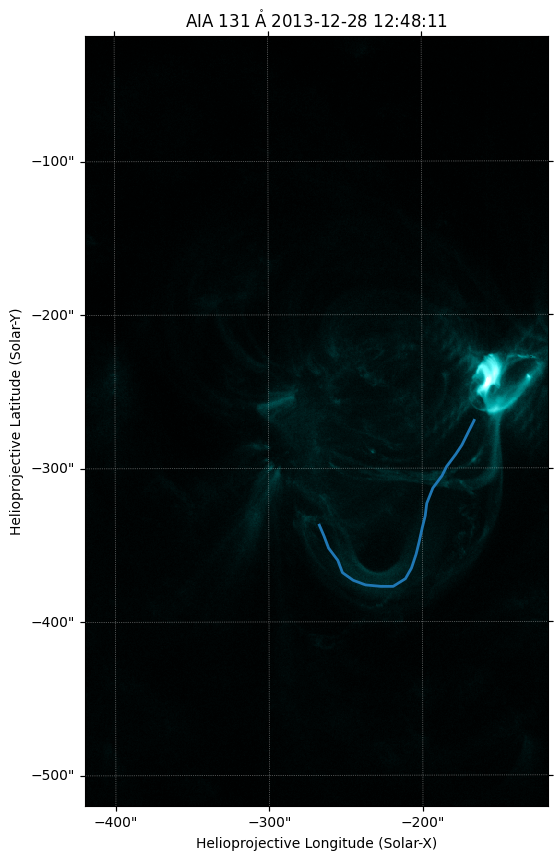

In [ ]:
n = 35
l = lines[1]
fig = plt.figure(figsize=(6, 10))
ax = fig.add_subplot(projection=aia_maps[l][n])
aia_maps[l][n].plot()
ax.plot_coord(traced_loop, lw=2)

In [ ]:
traced_loop_pixelated = sunpy.map.pixelate_coord_path(aia_maps[l][0], traced_loop)
traced_loop_distance = traced_loop_pixelated.separation(traced_loop_pixelated[0])

In [ ]:
intensity_stack = {str(l): [] for l in lines}
for l in lines:
    for m in aia_maps[l]:
        with SphericalScreen(m.observer_coordinate):
            _traced_loop_pixelated = sunpy.map.pixelate_coord_path(m, traced_loop)
        _traced_loop_distance = _traced_loop_pixelated.separation(_traced_loop_pixelated[0])
        intensity = sunpy.map.sample_at_coords(m, _traced_loop_pixelated)
        f_interp = interp1d(_traced_loop_distance.to_value('arcsec'), intensity.value, fill_value='extrapolate', kind='linear')
        intensity_interp = f_interp(traced_loop_distance.to_value('arcsec'))
        intensity_stack[str(l)].append(u.Quantity(intensity_interp, intensity.unit))
    intensity_stack[str(l)] = u.Quantity(intensity_stack[str(l)])

In [ ]:
time_array = [m.date.datetime for m in aia_maps[l]]
distance = traced_loop_distance.to(u.arcsec)

<ipython-input-45-873b1a15b0ae>:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(time_array, distance.value, intensity_stack[str(l)].value.T,


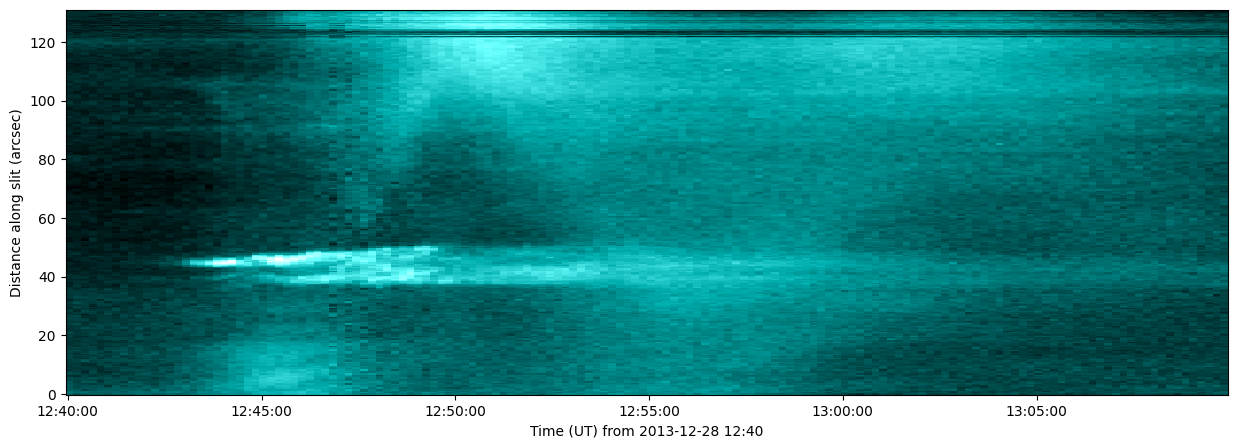

In [ ]:
l = lines[1]
# l = lines[0]
fig, ax = plt.subplots(figsize=(15, 5))
plt.pcolormesh(time_array, distance.value, intensity_stack[str(l)].value.T,
               norm=ImageNormalize(stretch=AsinhStretch()), cmap=f'sdoaia{l}')

ax.set_ylabel("Distance along slit (arcsec)")
ax.set_xlabel("Time (UT) from {:s}".format(time_array[0].strftime("%Y-%m-%d %H:%M")))
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M:%S"))

In [ ]:
intensity_stack['dist'] = distance.value
np.savez('results_detailed.npz', **intensity_stack)